# Simple Regression model / one feature

in this notebook:

1- Linear regression using close form from Machine Learning by Andrew gl. course

2- Linear regression using close form from Machine Learning, Regression by University of Washigton course

3- other methods for calculating predictions, residual sum of square ..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
pd.options.display.max_rows = 10
pd.options.display.max_columns=100

In [2]:
train=pd.read_csv('../data/kc_house_train_data.csv')

## Exploring data

In [3]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
17380,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
17381,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17382,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
id               17384 non-null int64
date             17384 non-null object
price            17384 non-null float64
bedrooms         17384 non-null int64
bathrooms        17384 non-null float64
sqft_living      17384 non-null int64
sqft_lot         17384 non-null int64
floors           17384 non-null float64
waterfront       17384 non-null int64
view             17384 non-null int64
condition        17384 non-null int64
grade            17384 non-null int64
sqft_above       17384 non-null int64
sqft_basement    17384 non-null int64
yr_built         17384 non-null int64
yr_renovated     17384 non-null int64
zipcode          17384 non-null int64
lat              17384 non-null float64
long             17384 non-null float64
sqft_living15    17384 non-null int64
sqft_lot15       17384 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [5]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.738400e+04,1.738400e+04,17384.000000,17384.000000,17384.000000,1.738400e+04,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000
mean,4.574349e+09,5.393666e+05,3.369363,2.115048,2080.029510,1.509191e+04,1.494248,0.007651,0.236079,3.410780,7.655028,1787.844512,292.184998,1971.152727,83.107973,98077.936896,47.559313,-122.213281,1985.994995,12776.380867
std,2.872356e+09,3.696912e+05,0.906468,0.771783,921.630888,4.145927e+04,0.539443,0.087136,0.768008,0.649792,1.169818,827.107595,444.404136,29.328722,398.692283,53.525617,0.138703,0.140906,686.512835,27175.730523
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.124087e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.049500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.468650,-122.328000,1490.000000,5100.000000
50%,3.892800e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.000000,2.500000,2550.000000,1.066525e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677625,-122.125000,2360.000000,10065.250000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
X=train.sqft_living
X=X.reshape(len(X),1)
y=train.price
y=y.reshape(len(y),1)

## Close Form #1
$β̂ =(X^{T}X)^{−1}X^{T}y$

In [7]:
# this was taken from Machine Learning MOOC by Andrew ng.
def closedForm(X,y):
    # you should catch np.linalg.LinAlgError Exception
    # X: mXn
    # y: mX1
    m,n=X.shape
    assert y.shape==(m,1)
    beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
    return beta

In [8]:
import time
m=y.shape[0]
first_column=np.ones((m,1))
features=np.concatenate([first_column,X],axis=1)

try:
    start = time.time()
    weights=closedForm(features,y)
    end=time.time()
    print weights
    print "time elapsed = {}".format(end-start)
except np.linalg.LinAlgErr:
    print "Non invertible matrix. Skip this one."

[[-47116.07907289]
 [   281.95883963]]
time elapsed = 0.0038731098175


## Closed Form #2

In [9]:
# method presented in machine learning , regression course by university of Washington
def simple_linear_regression(input_feature, output):
    N=float(np.shape(output)[0])
    numerator= np.matmul(input_feature.T,output)-(np.sum(input_feature)*np.sum(output))/N
    denominator=(np.sum(np.power(input_feature,2))-(np.sum(input_feature)*np.sum(input_feature))/N)
    slope=numerator/denominator
    intercept=np.sum(output)/N-slope*(np.sum(input_feature)/N)
    return(intercept[0], slope[0])

In [10]:
# CF: close form
start = time.time()
CF_intercept,CF_slope=simple_linear_regression(X,y)
end=time.time()
print "w0={} , w1={}".format(CF_intercept,CF_slope)
print "time elapsed = {}".format(end-start)

w0=[-47116.07907289] , w1=[ 281.95883963]
time elapsed = 0.00127005577087


The two functions returned the same results

In [11]:
def get_regression_predictions(input_feature, intercept, slope):  
    return input_feature*slope+intercept

In [12]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    predictions=get_regression_predictions(input_feature,intercept,slope)
    return np.matmul((predictions-y).T,(predictions-y))

In [13]:
def inverse_regression_predictions(output, intercept, slope):
    return (output-intercept)/slope

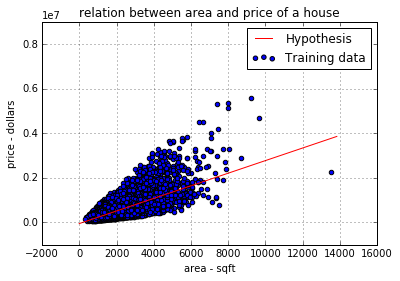

In [14]:
from lib.plotmd import plotDecisionBoundary
fig_boundary={}
xmin=min(X)-300
xmax=max(X)+300
yxmin=xmin*CF_slope+CF_intercept
yxmax=xmax*CF_slope+CF_intercept
plt.scatter(x=X,y=y)
plt.plot([xmin,xmax],[yxmin,yxmax],'r')
plt.title("relation between area and price of a house")
plt.xlabel("area - sqft")
plt.ylabel("price - dollars")
plt.legend(["Hypothesis","Training data"])
plt.grid()

In [15]:
house_sqft=2650
estimated_price=get_regression_predictions(house_sqft,CF_intercept,CF_slope)
print "The estimated price for a house with %d squarefeet is $%.2f" % (house_sqft, estimated_price)

The estimated price for a house with 2650 squarefeet is $700074.85


In [16]:
rss_sqft=get_residual_sum_of_squares(X,y,CF_intercept,CF_slope)
print "Residual square error for the current model {}".format(rss_sqft)

Residual square error for the current model [[  1.20191835e+15]]


In [17]:
house_price=800000
estimated_sqft=inverse_regression_predictions(800000,CF_intercept,CF_slope)
print "The estimated area for a house with price equals to $%d is %.2f sqft" % (house_price, estimated_sqft)

The estimated area for a house with price equals to $800000 is 3004.40 sqft
